### Final Project  
Course:  AAI-510-03 Machine Learning: Fundamentals and Applications
Semester: Summer 2025  
Institution: University of San Diego  
  
### Project Details  
Project Title:  Machine Learning for Flight Delay Prediction: A Cost-Optimization Approach
Authors: Greg Moore, Zachary Artman, Jack Baxter  
Instructor: David Friesen  
Submission Date: 06/23/2025  
  
### Dependencies  
Python [3.9 or higher]  
Jupyter Notebook  
kagglehub (or download the dataset from [here](https://www.kaggle.com/datasets/usdot/flight-delays))  
Libraries: [pandas, numpy, scikit-learn, matplotlib]  


In [26]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint
from xgboost import XGBClassifier, plot_importance
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import kagglehub
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb_mod
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))


## Problem statement and justification for the proposed approach.
When a flight is delayed, the engine is left running while the plane sits idle on the tarmac. While inevitable, for every 30 minutes a flight is delayed the airline burns $1,500-3000 in fuel cost. Similarly, airlines are required to pay crews 10-15% more for unplanned delays. At large airports, the daily toll of the extra wage is $500-2000 per airline (Airlines for America A4A 2023 report). With the Airline Dataset, our project aims to leverage ML strategies to predict a delay based on previous patterns by airline and airport. With this prediction, airlines have foresight to best manage, reroute or cancel flights, saving thousands of dollars daily from a business perspective. Additionally, flights identified by AI to consistently be delayed, or certain times that an airport is more likely to experience a delay can allow for more advanced flight planning to avoid unnecessary costs, and boost customer/traveler satisfaction rates. Specific ML models have yet to be chosen for our project, but once more EDA is performed to garner insight on the data itself, an ideal model/ensemble will be selected.


## Data understanding (EDA)

In [21]:
#create dataframe
path = kagglehub.dataset_download("usdot/flight-delays")
airlinedata = pd.read_csv(f"{path}/flights.csv")
airlinedata.head()

C:\Users\gregm\AppData\Local\Temp\ipykernel_29168\3124606796.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  airlinedata = pd.read_csv(f"{path}/flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#data summary and column description
sum = airlinedata.shape #shape data
print("airlinedata(row, col):",sum,"\r\n") 
for col in airlinedata.columns: #print data by col 
    print(airlinedata[col].describe()) 

airlinedata(row, col): (5819079, 31) 

count    5819079.0
mean        2015.0
std            0.0
min         2015.0
25%         2015.0
50%         2015.0
75%         2015.0
max         2015.0
Name: YEAR, dtype: float64
count    5.819079e+06
mean     6.524085e+00
std      3.405137e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: MONTH, dtype: float64
count    5.819079e+06
mean     1.570459e+01
std      8.783425e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: DAY, dtype: float64
count    5.819079e+06
mean     3.926941e+00
std      1.988845e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DAY_OF_WEEK, dtype: float64
count     5819079
unique         14
top            WN
freq      1261855
Name: AIRLINE, dtype: object
count    5.819079e+06
mean     2.173093e+03
std      1.757064e+03

In [4]:
#explore variables / remove uneccessary delay categories 
cols = list(airlinedata.columns)
i = 0
for vals in cols: 
    print(cols[i])
    i = i+1

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [5]:
#evaluate and remove columns with significant null values 
nulls = airlinedata.isna().sum()
print(nulls)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


## Data preparation & feature engineering

In [6]:
#remove the columns with abundant nulls, remove remaining NAs
nons = ['CANCELLATION_REASON','WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY']
airlinedata.drop(nons, axis=1, inplace=True)
airlinedata.dropna(inplace=True)

In [7]:
#remove unecessary information and drop NAN values 
shape = airlinedata.shape #shape data
print(shape)

(5714008, 25)


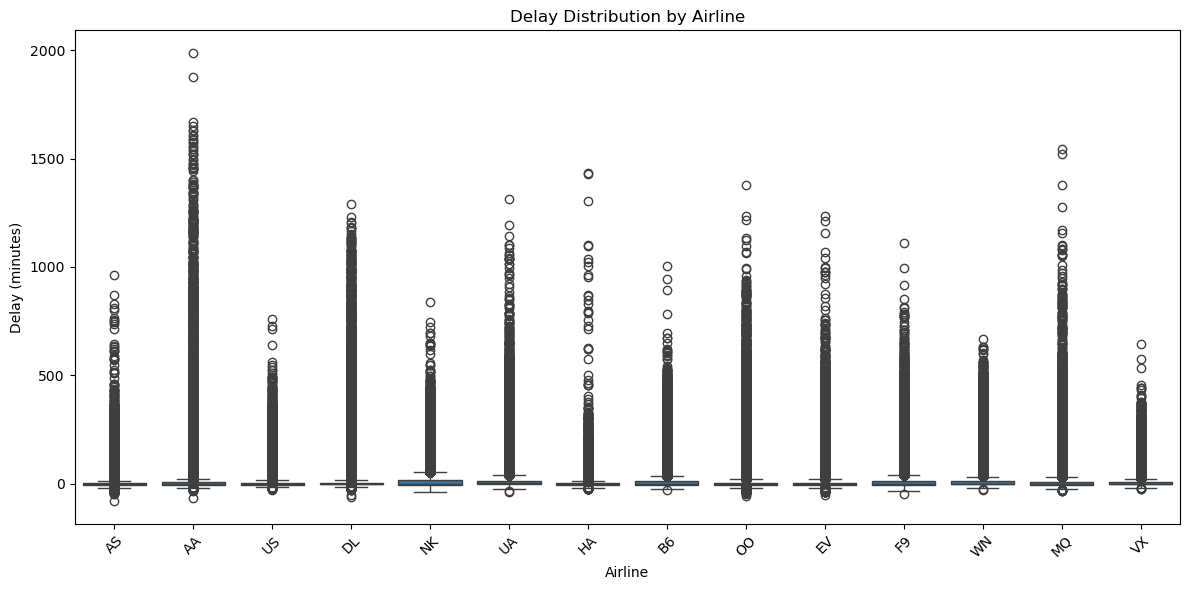

In [8]:
#garner delay by airline visual for EDA 
plt.figure(figsize=(12, 6))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=airlinedata)
plt.xticks(rotation=45)
plt.title('Delay Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')
plt.tight_layout()
plt.show()

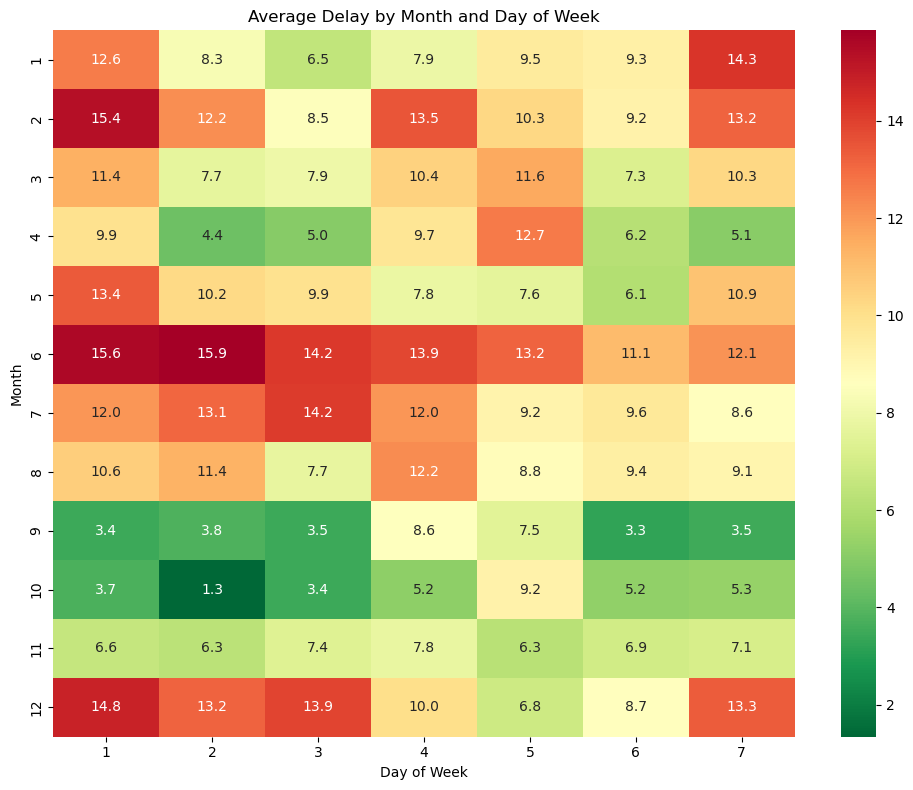

In [9]:
#pivot visualization for month/day delay averages 
pivot_table = airlinedata.pivot_table(values='DEPARTURE_DELAY', index='MONTH', columns='DAY_OF_WEEK', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn_r', fmt='.1f')
plt.title('Average Delay by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

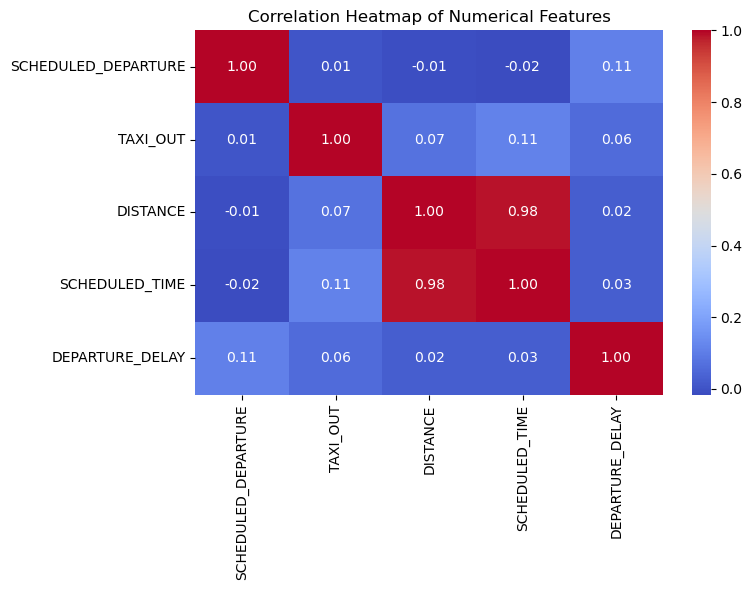

In [10]:
#check numerical cols for correlation 
numerical_cols = ['SCHEDULED_DEPARTURE', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'DEPARTURE_DELAY']
corr_matrix = airlinedata[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

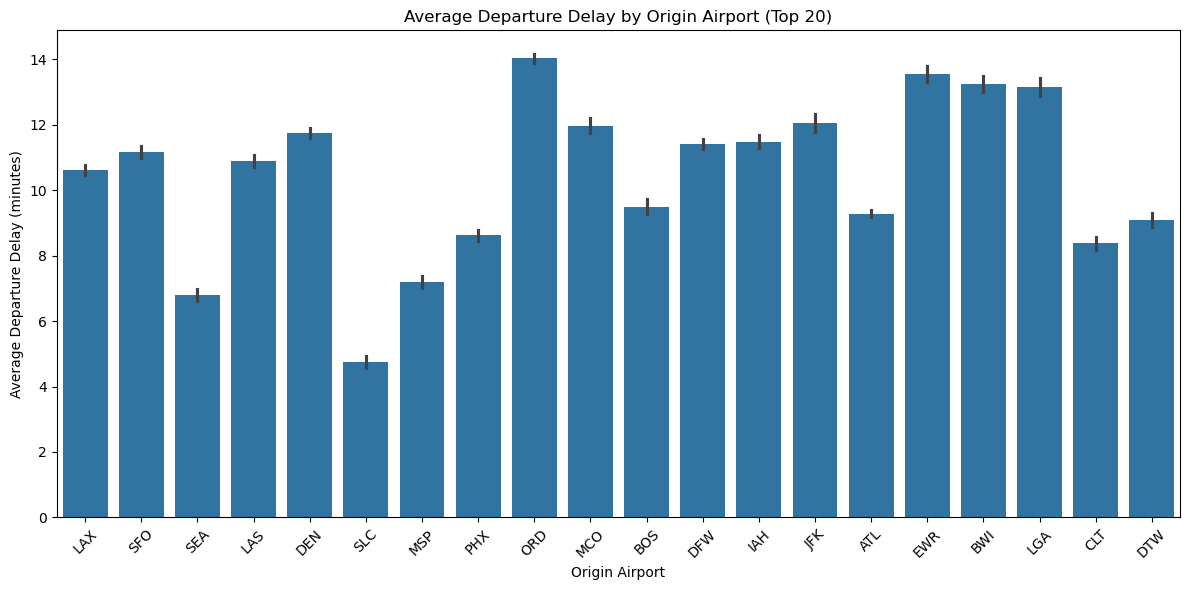

In [11]:
#inspect most frequent airports for potential outliers
top_airports = airlinedata['ORIGIN_AIRPORT'].value_counts().index[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', data=airlinedata[airlinedata['ORIGIN_AIRPORT'].isin(top_airports)])
plt.xticks(rotation=45)
plt.title('Average Departure Delay by Origin Airport (Top 20)')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.tight_layout()
plt.show()

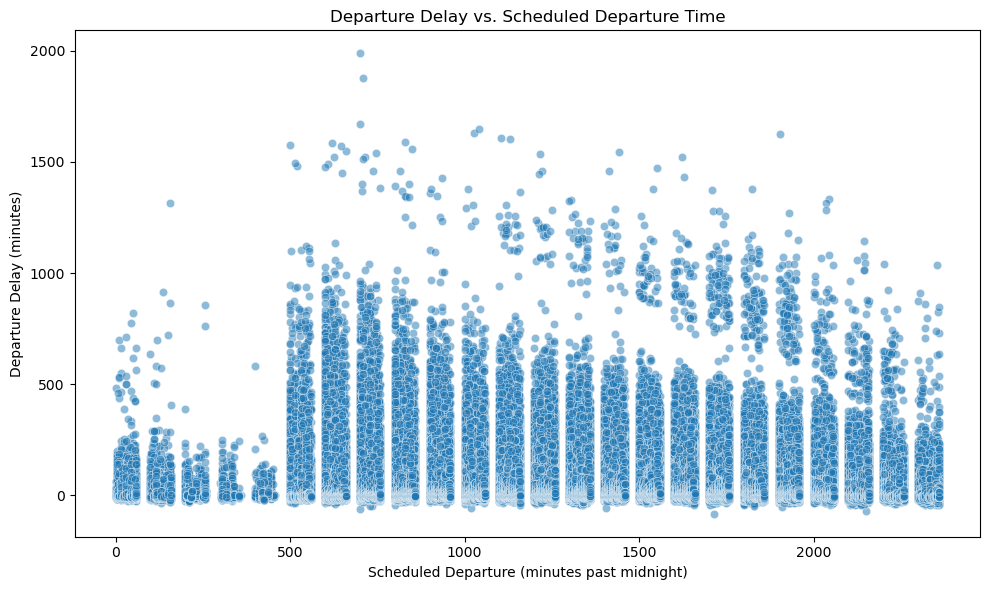

In [12]:
#visual for delay by scheduled time of day 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_DELAY', data=airlinedata, alpha=0.5)
plt.title('Departure Delay vs. Scheduled Departure Time')
plt.xlabel('Scheduled Departure (minutes past midnight)')
plt.ylabel('Departure Delay (minutes)')
plt.tight_layout()
plt.show()

Correlation with DEPARTURE_DELAY:
DEPARTURE_DELAY        1.000000
SCHEDULED_DEPARTURE    0.110419
SCHEDULED_ARRIVAL      0.097689
TAXI_OUT               0.058423
SCHEDULED_TIME         0.027582
DISTANCE               0.023957
TAXI_IN                0.012479
DAY                   -0.000257
DAY_OF_WEEK           -0.011450
MONTH                 -0.021827
YEAR                        NaN
Name: DEPARTURE_DELAY, dtype: float64


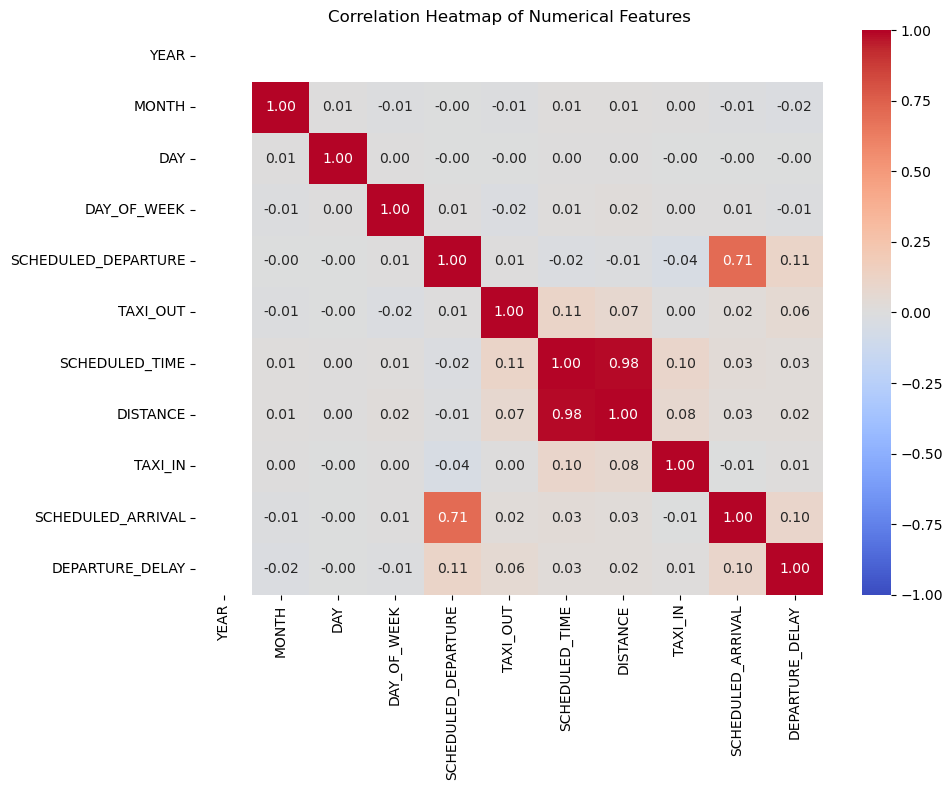

In [13]:
#evaluate numerical columns for correlation with delays 
nums = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'TAXI_OUT', 
                 'SCHEDULED_TIME', 'DISTANCE', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'DEPARTURE_DELAY']
corrmat = airlinedata[nums].corr()
correlations = corrmat['DEPARTURE_DELAY'].sort_values(ascending=False)
print("Correlation with DEPARTURE_DELAY:")
print(correlations)
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Feature Selection

In [27]:
#create random forest for feature importance evaluation 
airlinedatajan = airlinedata[airlinedata['MONTH'] == 1]
forestairlines = airlinedatajan.dropna(subset=['DEPARTURE_DELAY'])
cats = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER']
for col in cats:
    le = LabelEncoder()
    forestairlines[col] = le.fit_transform(forestairlines[col].astype(str))
vars = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 
                      'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 
                      'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED']
xvars = forestairlines[vars]
yvars = forestairlines['DEPARTURE_DELAY']
redwoodforest = RandomForestRegressor(n_estimators=10, random_state=42)
redwoodforest.fit(xvars, yvars)
whatsimportant = pd.Series(redwoodforest.feature_importances_, index=vars).sort_values(ascending=False)
print("Feature Importances:")
print(whatsimportant)

Feature Importances:
SCHEDULED_DEPARTURE    0.277234
SCHEDULED_ARRIVAL      0.272877
DEPARTURE_TIME         0.144568
WHEELS_ON              0.136863
WHEELS_OFF             0.053807
ARRIVAL_TIME           0.034367
DAY                    0.027561
ELAPSED_TIME           0.010980
TAXI_OUT               0.010924
AIR_TIME               0.004373
DISTANCE               0.004027
ORIGIN_AIRPORT         0.003942
SCHEDULED_TIME         0.003437
FLIGHT_NUMBER          0.003091
AIRLINE                0.002389
DESTINATION_AIRPORT    0.002380
TAIL_NUMBER            0.002332
TAXI_IN                0.001854
DIVERTED               0.001687
DAY_OF_WEEK            0.001302
CANCELLED              0.000006
MONTH                  0.000000
dtype: float64


## Modeling

In [28]:
# Remove rows where the DEPARTURE_DELAY value is missing (NaN)
airlinedatajan_clean = airlinedatajan.dropna(subset=['DEPARTURE_DELAY'])

# Select the categories and the predictors
cats = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER']
features = ['SCHEDULED_DEPARTURE','ORIGIN_AIRPORT','AIRLINE',
            'DAY_OF_WEEK','MONTH','DESTINATION_AIRPORT',
            'FLIGHT_NUMBER','TAIL_NUMBER','DAY','TAXI_OUT']

# Convert delay times to classes
# DEPARTURE_DELAY	    Departure Status
# 0			            On Time
# Negative number (< 0)	Early
# Positive number (> 0)	Delayed
conditions = [
    airlinedatajan_clean['DEPARTURE_DELAY'] == 0,
    airlinedatajan_clean['DEPARTURE_DELAY'] < 0,
    airlinedatajan_clean['DEPARTURE_DELAY'] > 0
]

# Choose the 3 different departure status
choices = ['On Time', 'Early', 'Delayed']

# Convert to the 3 classes
airlinedatajan_clean.loc[:, 'DEPARTURE_DELAY'] = np.select(conditions, choices, default='On Time')

# Set variables for train/test split
X = airlinedatajan_clean[features].copy()
y = airlinedatajan_clean['DEPARTURE_DELAY']

# Encode categorical variables
for col in cats:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Convert ['On Time', 'Early', 'Delayed'] to [2, 1, 0]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

C:\Users\gregm\AppData\Local\Temp\ipykernel_29168\3718793479.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Early' 'Early' 'Early' ... 'Delayed' 'On Time' 'Early']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  airlinedatajan_clean.loc[:, 'DEPARTURE_DELAY'] = np.select(conditions, choices, default='On Time')


### Model 1 - Random Forest

Features selected: SCHEDULED_DEPARTURE, ORIGIN_AIRPORT, AIRLINE, DAY_OF_WEEK, MONTH, DESTINATION_AIRPORT, FLIGHT_NUMBER, TAIL_NUMBER, DAY, TAXI_OUT

In [17]:
# select RF features
rf_feats = ['SCHEDULED_DEPARTURE','ORIGIN_AIRPORT','AIRLINE',
            'DAY_OF_WEEK','MONTH','DESTINATION_AIRPORT',
            'FLIGHT_NUMBER','TAIL_NUMBER','DAY','TAXI_OUT']
X_rf = airlinedatajan_clean[rf_feats].copy()
y_rf = y_encoded.copy()

# encode the categoricals
for col in ['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE','TAIL_NUMBER']:
    le = LabelEncoder()
    X_rf[col] = le.fit_transform(X_rf[col].astype(str))

# split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)

# train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_rf_train, y_rf_train)

# eval
y_rf_pred = rf.predict(X_rf_test)
y_rf_proba = rf.predict_proba(X_rf_test)
print("RF: Classification Report:", classification_report(y_rf_test, y_rf_pred))
print("RF: ROC AUC (ovr):", roc_auc_score(y_rf_test, y_rf_proba, multi_class='ovr'))

RF: Classification Report:               precision    recall  f1-score   support

           0       0.64      0.54      0.59     35183
           1       0.69      0.82      0.75     51374
           2       0.11      0.00      0.00      4846

    accuracy                           0.67     91403
   macro avg       0.48      0.46      0.45     91403
weighted avg       0.64      0.67      0.65     91403

RF: ROC AUC (ovr): 0.6868595768681578


### Model 2 - Logistic Regression

In [18]:
# reuse RF feature list
lr_feats = ['SCHEDULED_DEPARTURE','ORIGIN_AIRPORT','AIRLINE',
            'DAY_OF_WEEK','MONTH','DESTINATION_AIRPORT',
            'FLIGHT_NUMBER','TAIL_NUMBER','DAY','TAXI_OUT']
X_lr = airlinedatajan_clean[lr_feats].copy()
y_lr = y_encoded.copy()

# encode categoricals
for col in ['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE','TAIL_NUMBER']:
    le = LabelEncoder()
    X_lr[col] = le.fit_transform(X_lr[col].astype(str))

# split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr)

# train
lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_lr_train, y_lr_train)

# eval
y_lr_pred = lr.predict(X_lr_test)
y_lr_proba = lr.predict_proba(X_lr_test)
print("LR: Classification Report:", classification_report(y_lr_test, y_lr_pred))
print("LR: ROC AUC (ovr):", roc_auc_score(y_lr_test, y_lr_proba, multi_class='ovr'))

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

LR: Classification Report:               precision    recall  f1-score   support

           0       0.56      0.43      0.48     35183
           1       0.63      0.80      0.71     51374
           2       0.00      0.00      0.00      4846

    accuracy                           0.61     91403
   macro avg       0.40      0.41      0.40     91403
weighted avg       0.57      0.61      0.58     91403

LR: ROC AUC (ovr): 0.6121663605747778


### Model 3 - XG Boost

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Use XGBoost model classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Evaluation Metrics for XGB
# Use trained XGBoost model (xgb) to predict the class labels
y_pred = xgb.predict(X_test)
# Array of predicted class labels (0, 1, 2 for multiclass classification)
y_proba = xgb.predict_proba(X_test)

print("XGBoost: Classification Report:", classification_report(y_test, y_pred))

# Model ability to distinguish between classes (1.0 = perfect)
print("XGBoost: ROC AUC (ovr):", roc_auc_score(y_test, y_proba, multi_class='ovr'))

C:\Users\gregm\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Classification Report:               precision    recall  f1-score   support

           0       0.65      0.51      0.58     35326
           1       0.68      0.84      0.75     51480
           2       0.00      0.00      0.00      4857

    accuracy                           0.67     91663
   macro avg       0.44      0.45      0.44     91663
weighted avg       0.63      0.67      0.64     91663

XGBoost: ROC AUC (ovr): 0.7024903515794202


## Evaluation

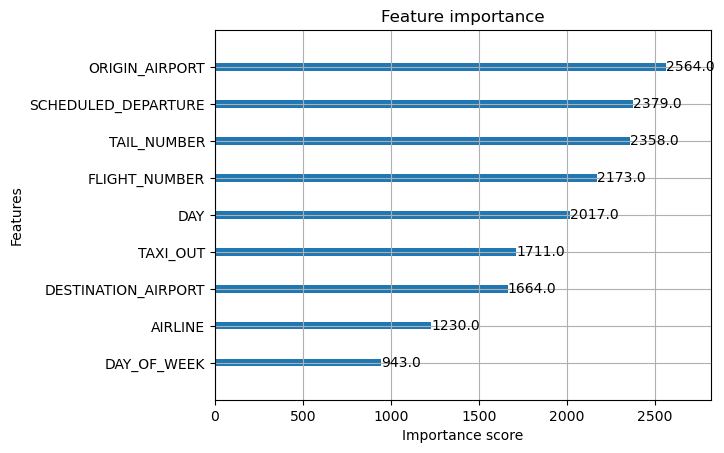

In [30]:
xgb_mod.plot_importance(xgb)
plt.show()

In [21]:
print("RF: Classification Report:", classification_report(y_rf_test, y_rf_pred))
print("RF: ROC AUC (ovr):", roc_auc_score(y_rf_test, y_rf_proba, multi_class='ovr'))

RF: Classification Report:               precision    recall  f1-score   support

           0       0.64      0.54      0.59     35183
           1       0.69      0.82      0.75     51374
           2       0.11      0.00      0.00      4846

    accuracy                           0.67     91403
   macro avg       0.48      0.46      0.45     91403
weighted avg       0.64      0.67      0.65     91403

RF: ROC AUC (ovr): 0.6868595768681578


In [22]:
print("LR: Classification Report:", classification_report(y_lr_test, y_lr_pred))
print("LR: ROC AUC (ovr):", roc_auc_score(y_lr_test, y_lr_proba, multi_class='ovr'))

LR: Classification Report:               precision    recall  f1-score   support

           0       0.56      0.43      0.48     35183
           1       0.63      0.80      0.71     51374
           2       0.00      0.00      0.00      4846

    accuracy                           0.61     91403
   macro avg       0.40      0.41      0.40     91403
weighted avg       0.57      0.61      0.58     91403

LR: ROC AUC (ovr): 0.6121663605747778


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
print("XGBoost: Classification Report:", classification_report(y_test, y_pred))

# Model ability to distinguish between classes (1.0 = perfect)
print("XGBoost: ROC AUC (ovr):", roc_auc_score(y_test, y_proba, multi_class='ovr'))

XGBoost: Classification Report:               precision    recall  f1-score   support

           0       0.65      0.51      0.58     35326
           1       0.68      0.84      0.75     51480
           2       0.00      0.00      0.00      4857

    accuracy                           0.67     91663
   macro avg       0.44      0.45      0.44     91663
weighted avg       0.63      0.67      0.64     91663

XGBoost: ROC AUC (ovr): 0.7024903515794202


#### Among the three models used, XGBoost achieved the best overall performance with the highest ROC AUC (0.70) and strong metrics for class 1 (f1-score of 0.75). Random Forest followed closely behind with comparable accuracy (0.67) and f1-scores but slightly lower ROC AUC (0.69). Logistic Regression performed the worst, with the lowest overall accuracy (0.61) and ROC AUC (0.61), which shows the the model's limited capacity to capture more complex patterns that the other models were able to do. All models struggled to predict class 2 (severely delayed flights), suggesting class imbalance or insufficient predictive features for that class. XGBoost is the preferred model for this project.

## Deployment

#### Based on the model results and comparisons, it seems the XGBoost multiclass classifier model would be the best choice to deploy as an airline flight delay prediction system. We would want to deploy the Model as a Real-Time Flight Delay Prediction system. The airline flight delay prediction system would need to interface through an API (Application Programming Interface) to a system locally installed (more expensive) or through a cloud service to provide the hardware for the XGBoost model to run on. The airline traffic control (ATC) real-time flight data could be provided through the API to the cloud service where the airline delay prediction XGBoost model can provide predictions instantly.

#### Serialize the model: Use joblib or pickle to serialize the XGBoost airline flight delay prediction model to stored, used, and updated in the cloud service.

#### API: Use something similar to FastAPI to create a framework around the model. The API can receive the air traffic control data and transmit it to the XGBoost model. The model receives the air traffic control data and makes the prediction and transmits the prediction back to API which sends the prediction to the overall airline system. The API must have low latency to be able to give real-time predictions for real-time data.

#### Cloud Service: Instead of hosting a local hardware system, we want to use a cloud service center for a number of reasons. Developing, maintaining, supporting, and updating hardware systems is very expensive. With new technologies being developed constantly, you want to use the fastest and cheapest solutions possible as part of business. New AI semiconductor devices will continue being developed and available, so each new datacenter board with new semiconductors take about 2 years to develop and deploy and is very expensive. So, as part of the airline industry as the focus, we will want to just use a cloud service for the airline flight delay predictions. Scalability will have to be a part of the prediction capabilities as the demand for flight delay predictions will increase and decrease based on flight traffic. Besides scaling for loads, it will need to load balance to maintain efficiency. The system will need to run 24/7.

#### Security and Updates: The prediction system needs to include data encryption and security measures such as authentication since there will be airline data and potential passenger data attached. The prediction system will need to updated as new data is acquired, the airline flight delay prediction model should be retrained using the new data and redeployed improving performance.

## Discussion and conclusions

**address the problem statement and recommendation**